In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import shap

import xgboost
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


PATH_PROJECT = "/home/yoshraf/projects/mestrado/"

X_train_c = pd.read_parquet(f"{PATH_PROJECT}data/discrete_choice/X_train.parquet")
X_test_c = pd.read_parquet(f"{PATH_PROJECT}data/discrete_choice/X_test.parquet")
y_train_c = pd.read_parquet(f"{PATH_PROJECT}data/discrete_choice/y_train.parquet")
y_test_c = pd.read_parquet(f"{PATH_PROJECT}data/discrete_choice/y_test.parquet")

X_train = pd.read_parquet(f"{PATH_PROJECT}data/how_far/X_train.parquet")
X_test = pd.read_parquet(f"{PATH_PROJECT}data/how_far/X_test.parquet")
y_train = pd.read_parquet(f"{PATH_PROJECT}data/how_far/y_train.parquet").values
y_test = pd.read_parquet(f"{PATH_PROJECT}data/how_far/y_test.parquet").values

## SHAP in Linear Regression

In [2]:
# a simple linear model
model = LinearRegression()
model.fit(X_train, y_train)
print("Model coefficients:\n")
for i in range(X_train.shape[1]):
    print(X_train.columns[i], "=", model.coef_[0][i].round(4))

Model coefficients:

Idade = 19.4335
Total de viagens da pessoa = -545.7671
loc_origem_count_parada = 8.5336
loc_origem_count_ilum_std = -3.073
loc_origem_dist_metro = 0.1269
loc_origem_dist_trem = -0.3563
loc_origem_dist_term = 0.0448
loc_origem_dist_ciclo = 0.1836
loc_origem_ACC_TI_A_E_60M = -0.0004
loc_origem_ACC_TI_A_L_TP_ = 2.2566
per Quantidade de automóveis = 666.3527
per Quantidade de motocicletas = 811.9354
per Quantidade de bicicletas = -341.6225
per Renda familiar mensal = -0.0982
Situação familiar_Conjugê/ companheiro(a) = 314.0904
Situação familiar_Filho(a)/ enteado(a) = -363.2657
Situação familiar_Pessoa responsável = 429.8171
Situação familiar__outros_ = -380.6419
Gênero_Masculino = 548.6101


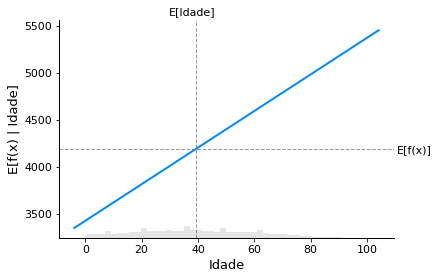

In [3]:
# fig, ax = plt.subplots(1, figsize=(20,10))
shap.plots.partial_dependence(
    "Idade", model.predict, X_train, ice=False,
    model_expected_value=True, feature_expected_value=True
)

In [4]:
X100 = shap.utils.sample(X_train, 100)

In [5]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model, X100)
shap_values = explainer(X100)

.values =
-571.3460945037706

.base_values =
4157.93937799866

.data =
11.0


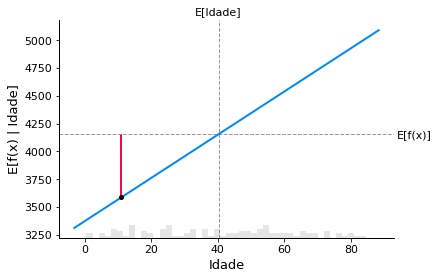

In [6]:
# make a standard partial dependence plot
sample_ind = 18
print(shap_values[sample_ind,"Idade"])
shap.partial_dependence_plot(
    "Idade", model.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

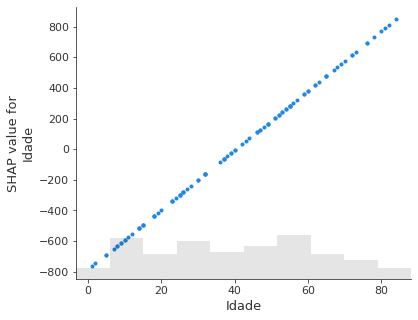

In [7]:
shap.plots.scatter(shap_values[:,"Idade"])

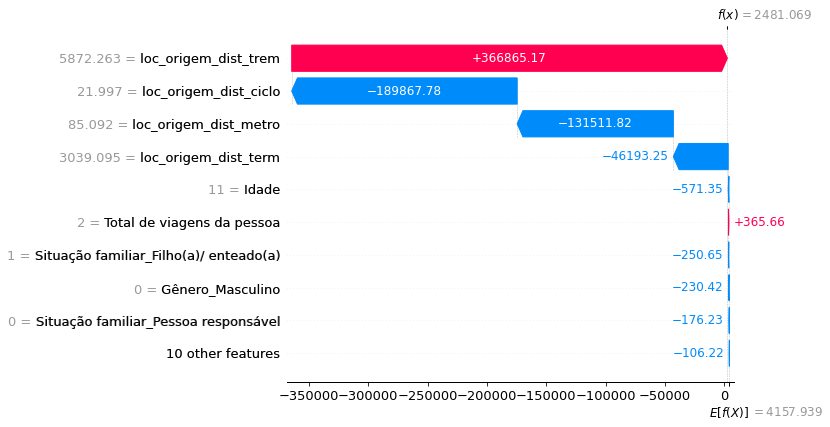

In [9]:
shap.waterfall_plot(shap_values[sample_ind], 10)

## Logistic Regression

In [18]:
# a classic adult census dataset price dataset
X_adult,y_adult = shap.datasets.adult()

# a simple linear logistic model
model_adult = LogisticRegression(max_iter=10000)
model_adult.fit(X_adult, y_adult)

def model_adult_proba(x):
    return model_adult.predict_proba(x)[:,1]
def model_adult_log_odds(x):
    p = model_adult.predict_log_proba(x)
    return p[:,1] - p[:,0]

In [37]:
for i in range(X_adult.shape[1]):
    print(X_adult.columns[i], "=", model_adult.coef_[0][i])

Age = 0.03484443719112795
Workclass = -0.02538270515577225
Education-Num = 0.3726198413298241
Marital Status = -0.17492069277929434
Occupation = 0.015390685948934467
Relationship = 0.540826348704963
Race = 0.11156510059946584
Sex = 0.5657136995510545
Capital Gain = 0.00032637925834316046
Capital Loss = 0.0006881779654177889
Hours per week = 0.03479746604546591
Country = 0.006550253587079718


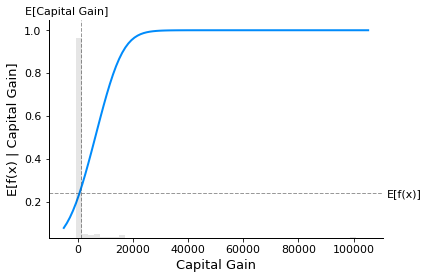

In [21]:
fig,ax = shap.partial_dependence_plot(
    "Capital Gain", model_adult_proba, X_adult, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)

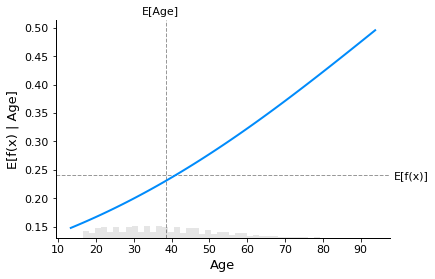

In [48]:
fig,ax = shap.partial_dependence_plot(
    "Age", model_adult_proba, X_adult, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)

In [49]:
# compute the SHAP values for the linear model
# background_adult = shap.maskers.Independent(X_adult, max_samples=100)
explainer = shap.Explainer(model_adult_proba, X_adult[:500])
shap_values_adult = explainer(X_adult[:500])

Permutation explainer: 501it [00:48,  7.81it/s]                         


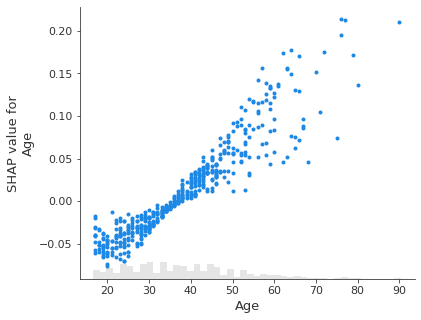

In [51]:
shap.plots.scatter(shap_values_adult[:,"Age"])

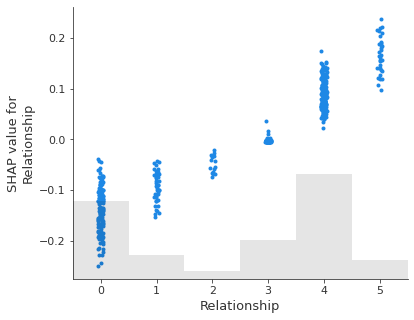

In [58]:
shap.plots.scatter(shap_values_adult[:,"Relationship"])

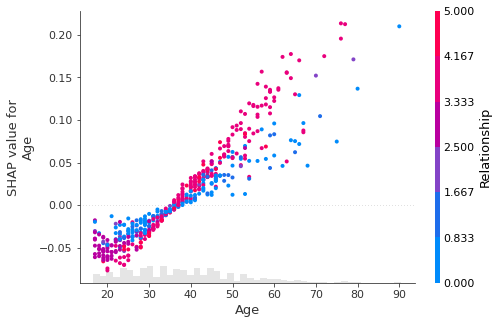

In [57]:
shap.plots.scatter(shap_values_adult[:,"Age"], color=shap_values_adult[:,"Relationship"])

In [59]:
# compute the SHAP values for the linear model
explainer_log_odds = shap.Explainer(model_adult_log_odds, X_adult[:500])
shap_values_adult_log_odds = explainer_log_odds(X_adult[:500])

Permutation explainer: 501it [00:49,  8.37it/s]                         


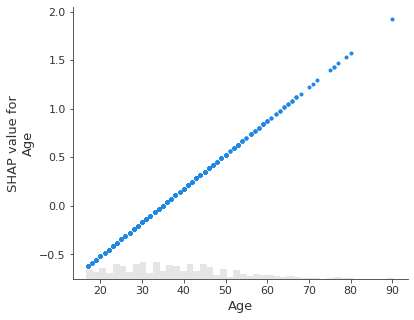

In [60]:
shap.plots.scatter(shap_values_adult_log_odds[:,"Age"])

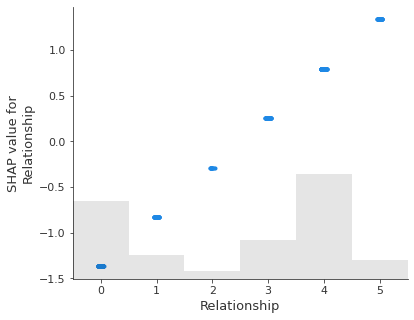

In [61]:
shap.plots.scatter(shap_values_adult_log_odds[:,"Relationship"])